In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## 1

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [121]:
commits = pd.io.sql.read_sql(
    """
    SELECT uid, timestamp, numTrials
    FROM checker
    WHERE uid LIKE "user_%" 
          AND status = "ready"
          AND labname = "project1";
    """,
    con=conn,
    parse_dates=['timestamp']
)
commits['timestamp'] = commits['timestamp'].dt.date

In [122]:
commits = commits.groupby(by=['timestamp', 'uid'])['numTrials'].count().unstack()
commits = commits.fillna(0)
commits = commits.cumsum()

Text(0.5, 0, 'timestamp')

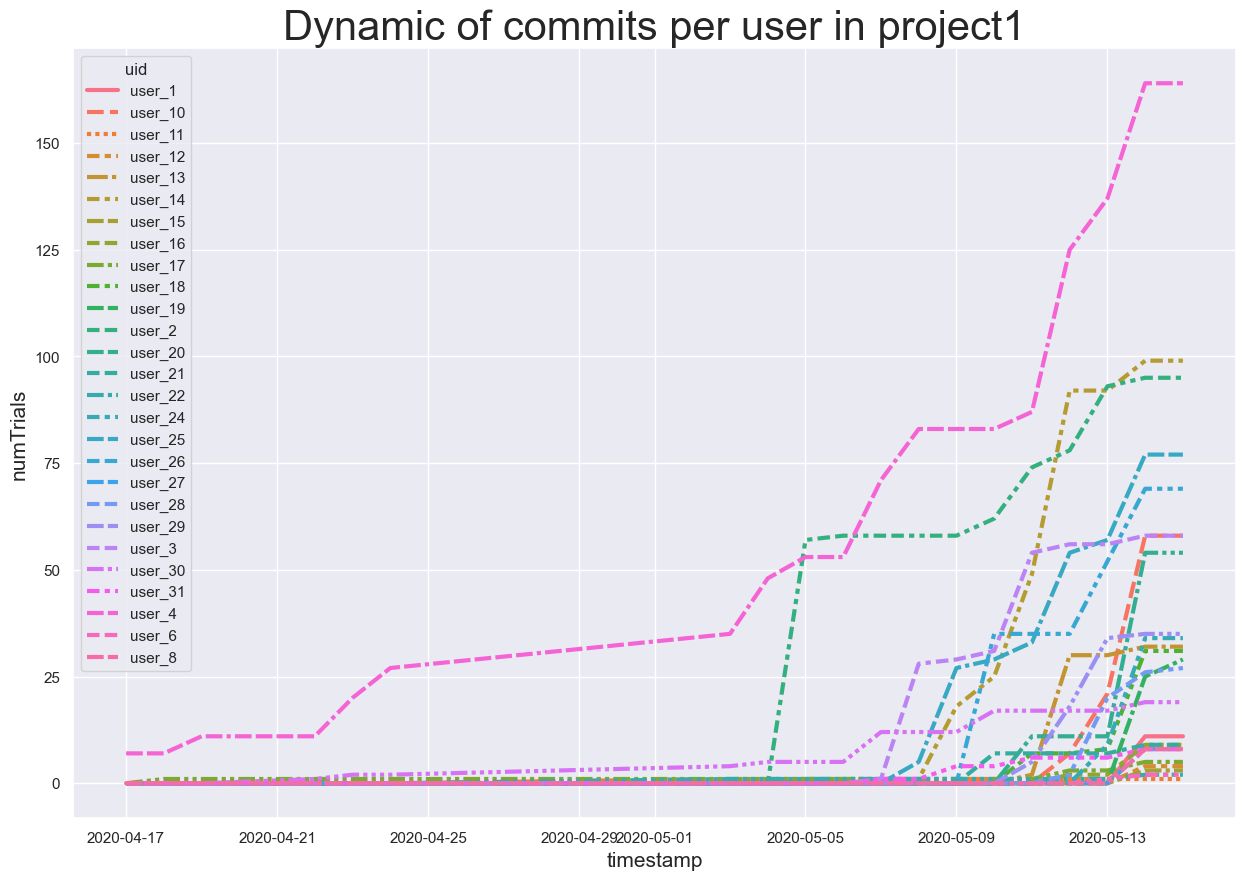

In [123]:
sns.set_theme(style='darkgrid', rc={'figure.figsize':(15, 10)})
p = sns.lineplot(data=commits, linewidth=3)
p.set_title('Dynamic of commits per user in project1', fontdict={'size': 30})
p.set_ylabel('numTrials', fontdict={'size': 15})
p.set_xlabel('timestamp', fontdict={'size': 15})

## 3

In [124]:
conn.close()

## 4

Which user was the leader in the number of commits almost all of the time? - user_4

Which user was the leader for only a short period of time? - user_2